In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
from sklearn import metrics as ms
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
abalone_data  = pd.read_csv(r'https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv' )

abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


# Exploratory Data Analysis

*   Check the datatype of all the variables in the data
*   Check whether there are any missing data or null data in the dataset .
If found replace with appropiate value such as mean /median .Else if there has been any data insertion error and the variance is not large enough to impact the dataset ,then keep it.

In [3]:
abalone_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [4]:
abalone_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


# Data  Visualization 

1.Get the visualisation between varibles through pair plots and histogram
2.Visualize the correlation between variables through plots .


Univariate Analysis

In this section the distribution of each attribute is analyzed individually. We start analyzing the distribution of the target attribute Rings. The rest of the attributes are divided in groups for convenience of the analysis: a group called Size, containing attributes that represents the dimensions of an abalone, a group Weight, containing the different weight attributes and a third group composed only of the Sex attribute. The continous or quantitative attributes were analyzed using histograms and boxplots, while categorical attributes were analyzed using barplots.

The Target Attribute

The analysis shows that the Ring attribute values ranges from 1 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate the distribution of this attribute to a normal curve.

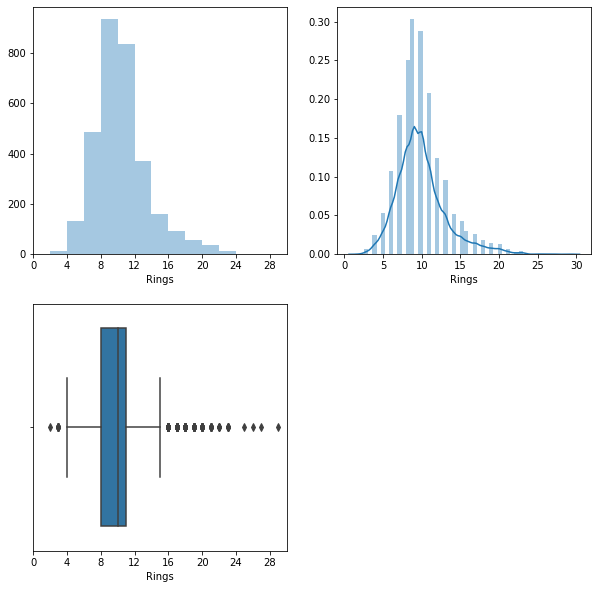

In [6]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(abalone_data['Rings'])

# Size Attributes

In this section, we analyze the attributes that represents the dimensions of an abalone. These attributes are Lenght, Diameter and Height. For each of these attributes we plotted two histograms and their respective boxplot. The first histogram is a density histogram and a kernel density estimate, and the second is the absolute frquencies of the attribute, with some adjustments to ticks and bins. Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.

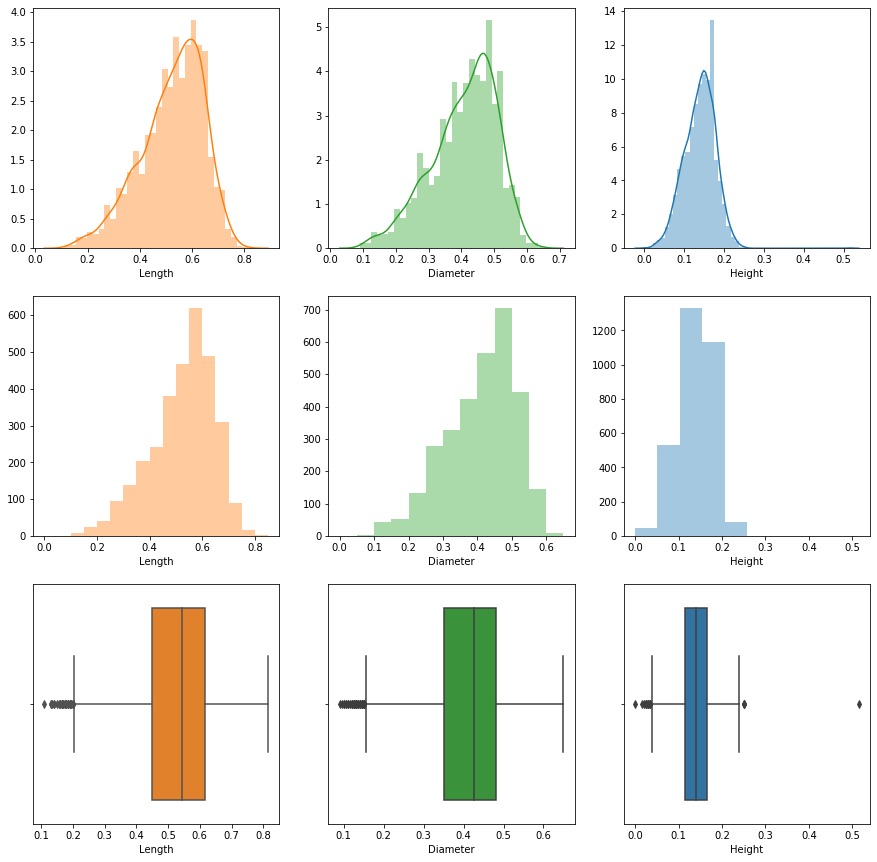

In [8]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone_data['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone_data['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone_data['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone_data['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone_data['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone_data['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone_data['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone_data['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone_data['Height'], color=colors[i % 3])

# Weight Attributes


The weight attributes were analyzed following a similar approach to the Size attributes analysis. 
A similar distributions were observed, however, for the weight attributes the bell curve is a little larger.

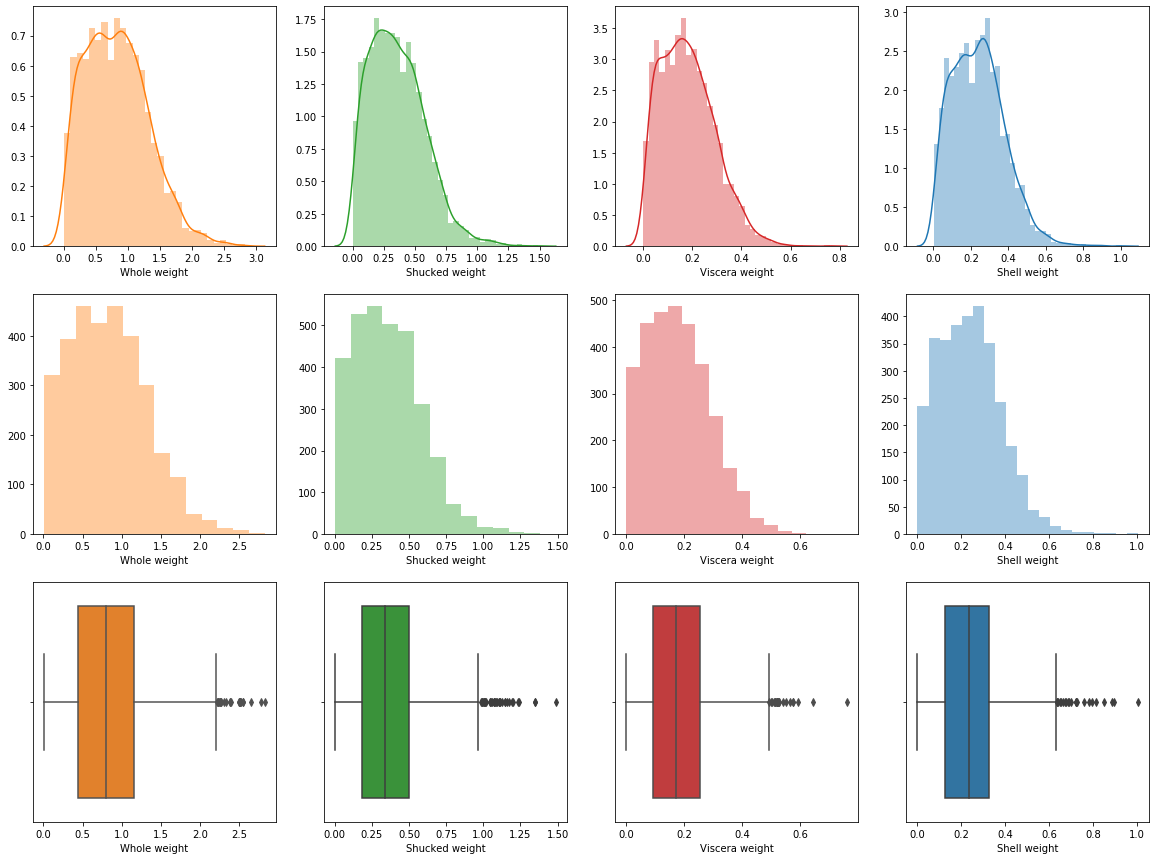

In [11]:
plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Whole weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Shell weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone_data['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_data['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_data['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_data['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_data['Shell weight'], color=colors[i % cols])

# Sex
The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

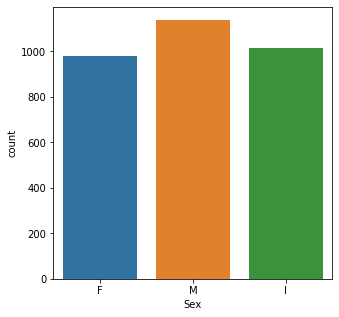

In [13]:
plt.figure(figsize=(5,5))
_ = sns.countplot(abalone_data.Sex)

# Multivariate Analysis

In this section we analyzed how the dataset attributes are related and how the independent variables influences the target variable. Our first step in the multivariate analysis was to visualize the correlation matrix in a heatmap:

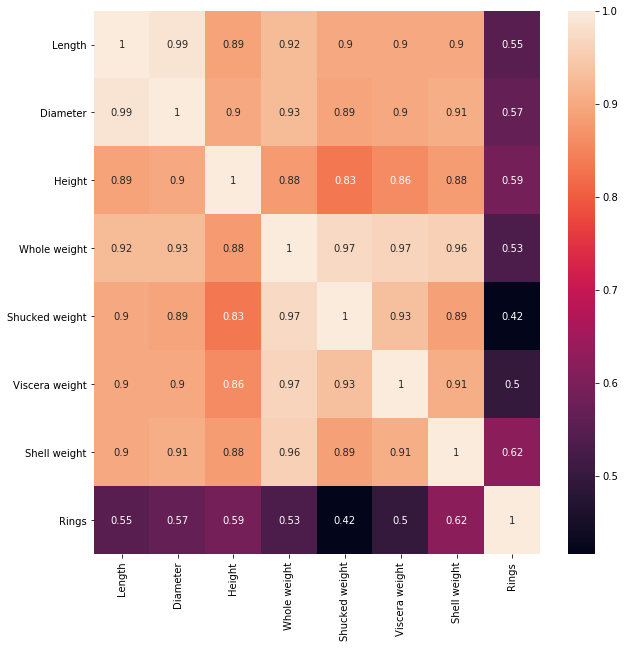

In [15]:
plt.figure(figsize=(10, 10))
corr = abalone_data.corr()
_ = sns.heatmap(corr, annot=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


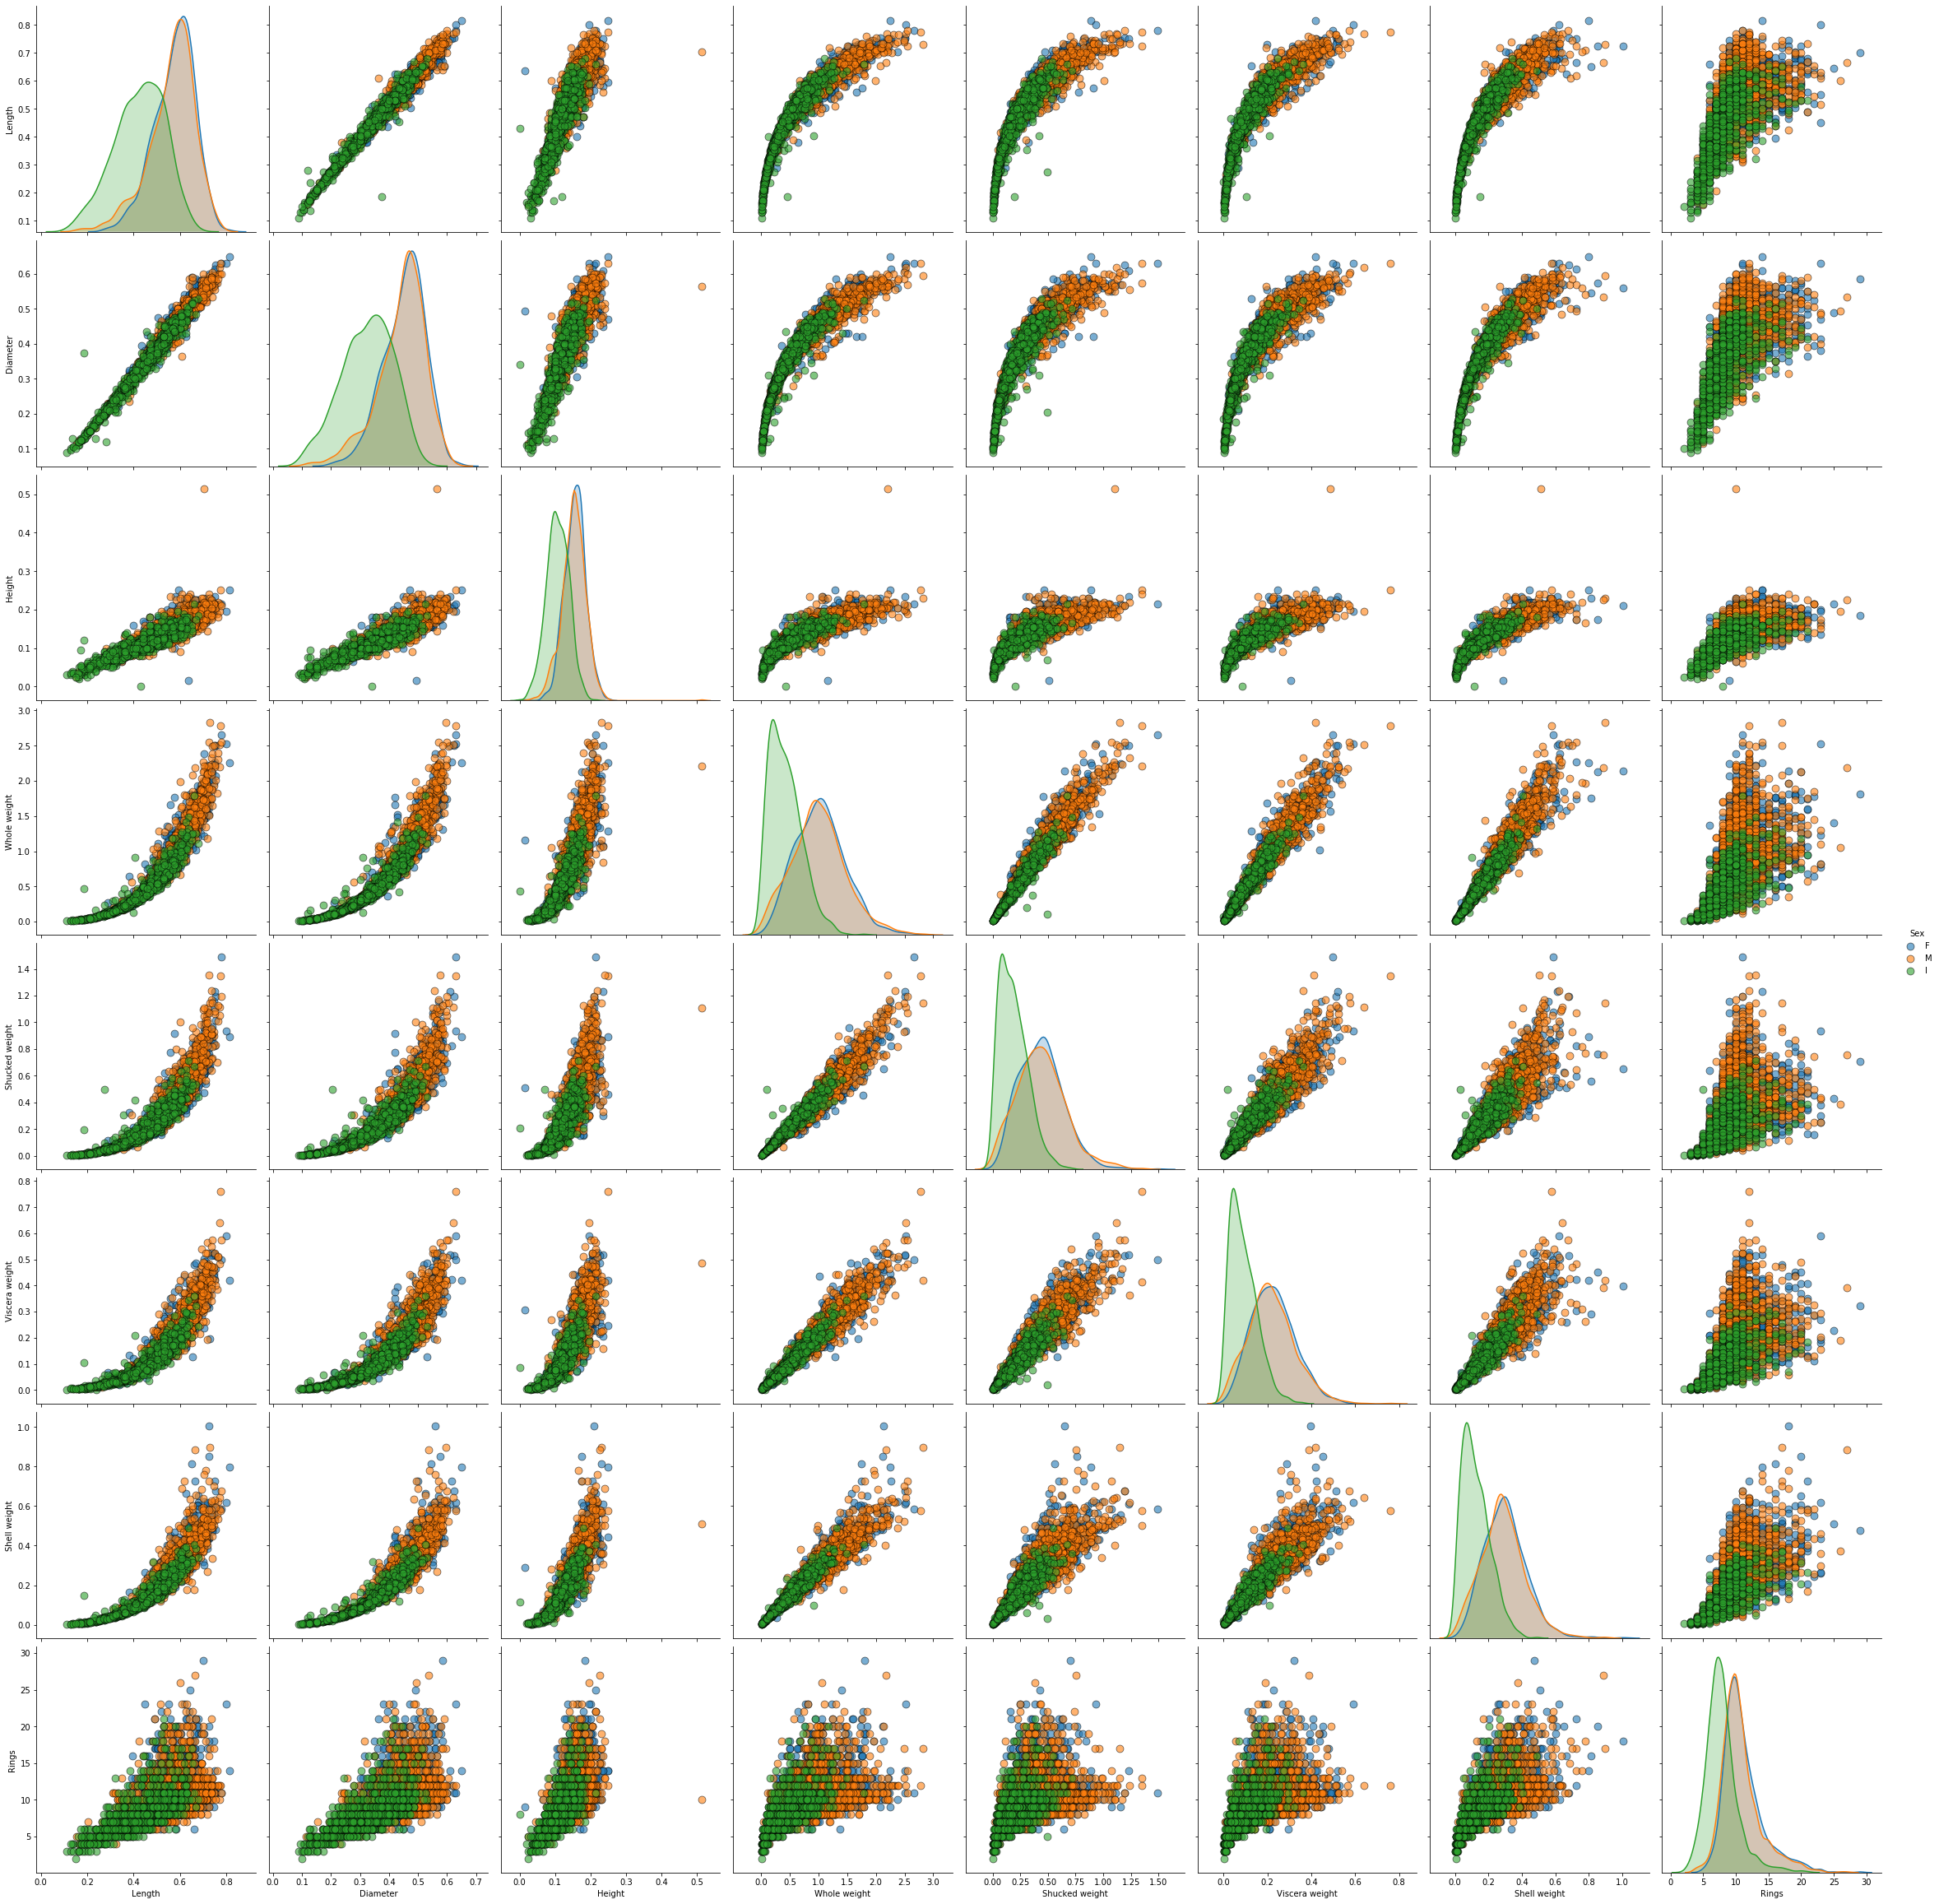

In [16]:
sns.pairplot(abalone_data, hue = 'Sex', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates to Rings. 
Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings:

<Figure size 1440x360 with 0 Axes>

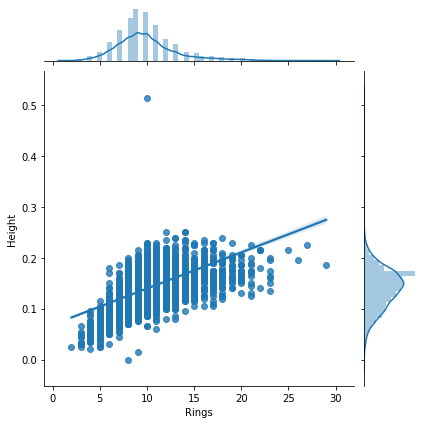

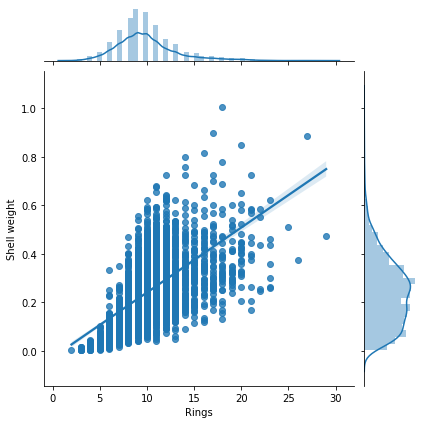

In [18]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=abalone_data, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone_data, x='Rings', y='Shell weight', kind='reg')

We Notice an interesting pattern: for lower values of Rings we have concentrated values of Height and Shell weight. As the value of Rings increases, 
    the scatterplot becames larger, and for the highest values of Rings it become disperse.
    
    
How correlation varies with the number of rings ?


Based on the previous analysis, we decided to investigate the variation of the correlation regarding the number of rings in more detail. We tested for many values, and found that the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.

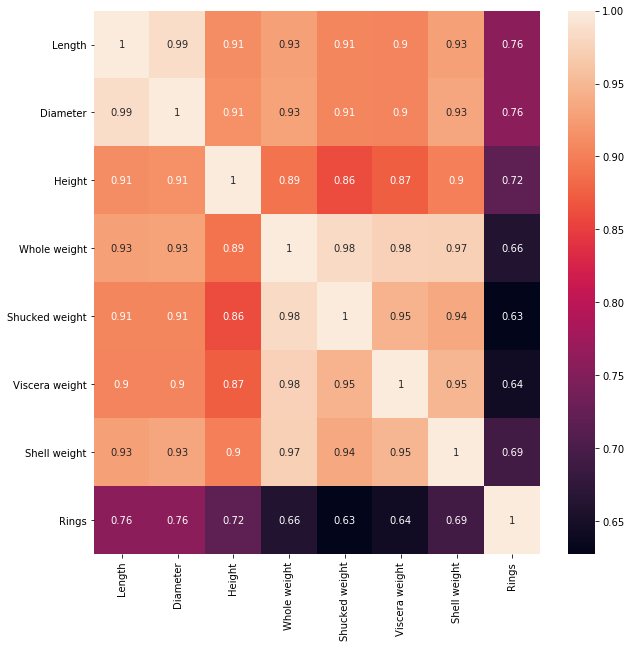

In [19]:
i_abalone = abalone_data[abalone_data['Rings'] < 10]

plt.figure(figsize=(10, 10))
corr = i_abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

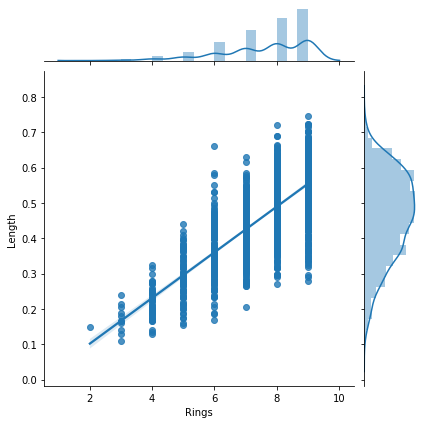

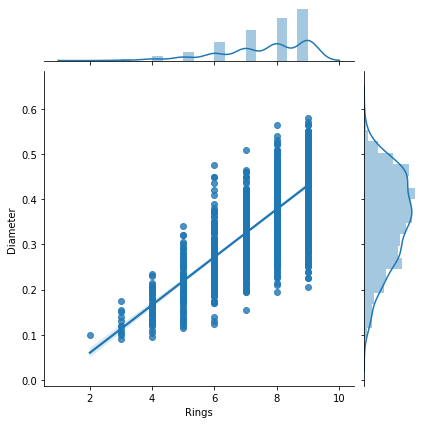

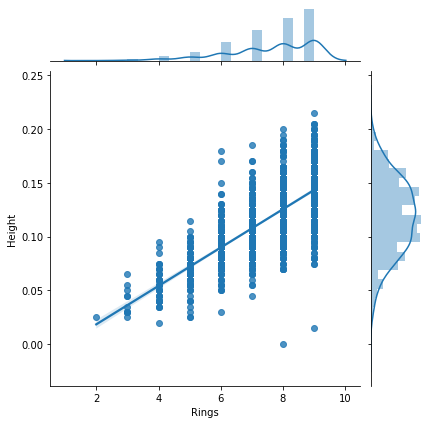

In [20]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_abalone, x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')

<Figure size 1440x360 with 0 Axes>

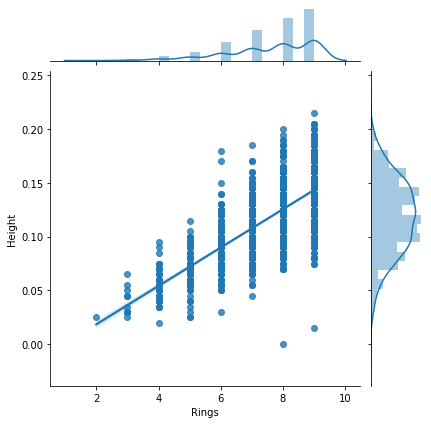

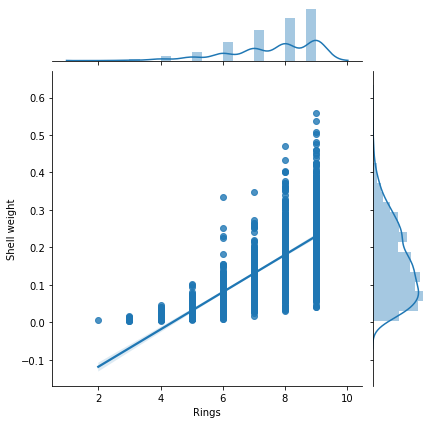

In [21]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_abalone, x='Rings', y='Height',  kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Shell weight', kind='reg')

On the other hand, when we consider only samples with more than 10 Rings we observe that 
correlation decays drastically to near 0 (zero):

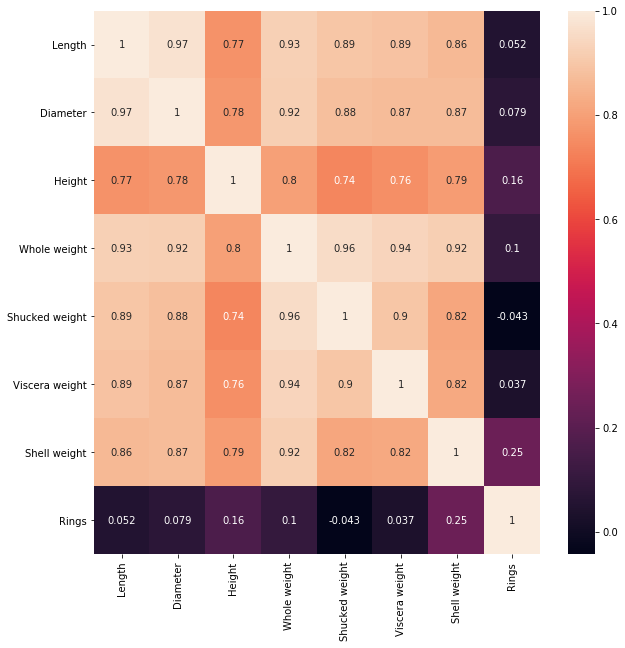

<Figure size 1440x720 with 0 Axes>

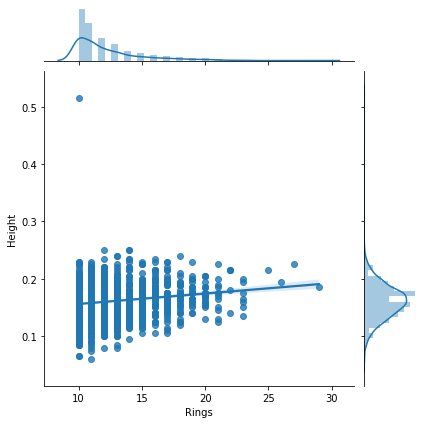

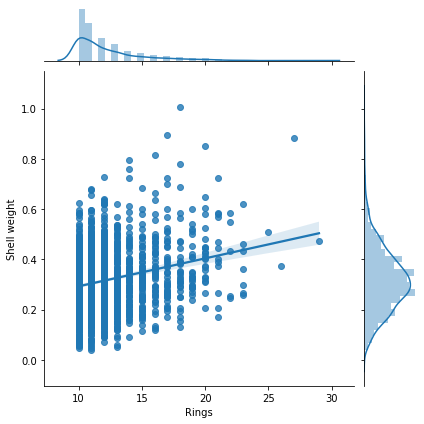

In [22]:
a_abalone = abalone_data[abalone_data['Rings'] >= 10]

plt.figure(figsize=(10, 10))
corr = a_abalone.corr()
_ = sns.heatmap(corr, annot=True)

plt.figure(figsize=(20, 10))

_ = sns.jointplot(data=a_abalone, y='Height', x='Rings', kind='reg')
_ = sns.jointplot(data=a_abalone, y='Shell weight', x='Rings', kind='reg')

These results suggest that abalones grows in size and weight until a certain age, near 10 years. 
After this age their size and age remains stable in function of age, depending more on environmental factors.

# Influence of Sex on attributes
Finally, we analyze how the Sex category influences the distribution of variables Rings, Height and Shell weight. Our objective is learn if the different categories of abalones have different distribution parameters or even form. To accomplish this objective, we visualize the distribution of each one of these parameters in relation to Sex. Finally, we analyze how the different Sex categories of abalones influence the correlation of Rings, Height and Shell weight.

Our first step is to analyze how Sex categories influence the number of Rings. We observe that the median of Rings for the I category is lower than the median for M and F categories.

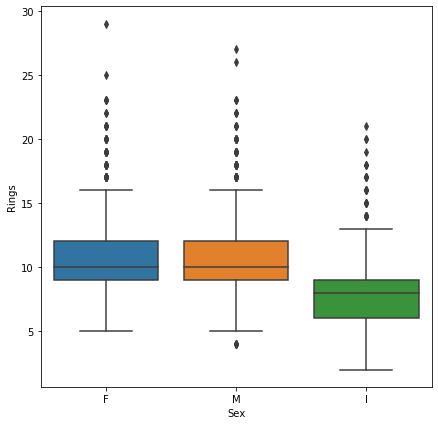

In [23]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone_data, x='Sex', y='Rings')

However, the form of the distribution remains similar: samples are concentrated around the mean of the distribution.
The difference is that for Infant abalones the mean of Rings is lower.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


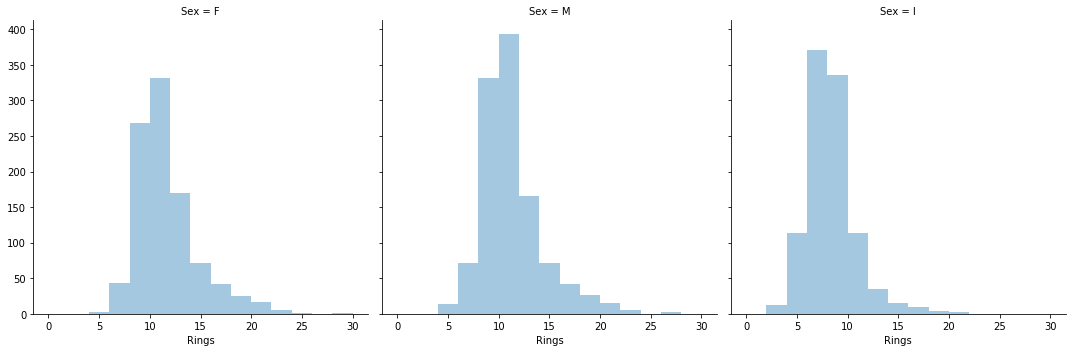

In [24]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

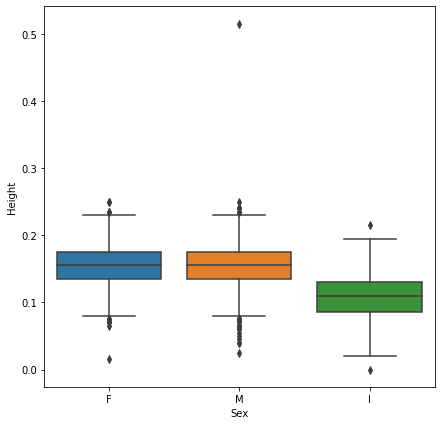

In [25]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone_data, x='Sex', y='Height')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


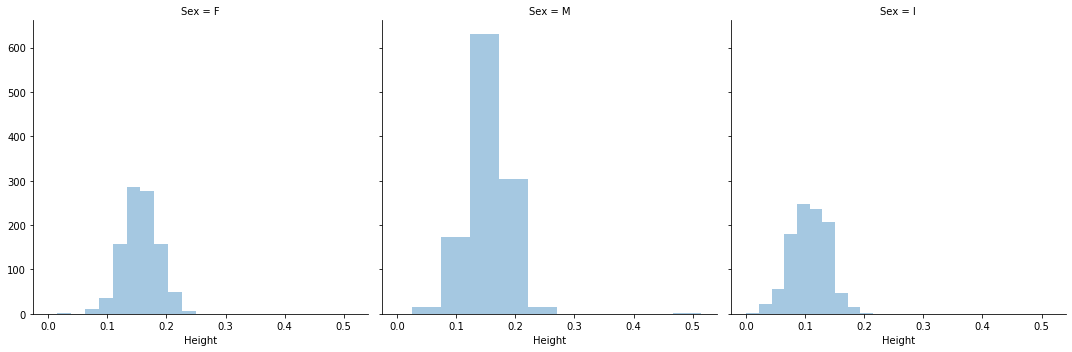

In [26]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

Finally, we analyze how the categories influence the correlations Ring x Height and Ring x Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger correlation to rings.
Observing the regression curve for the Infant category, we notice that its inclination is closer to 45°.

<Figure size 1440x360 with 0 Axes>

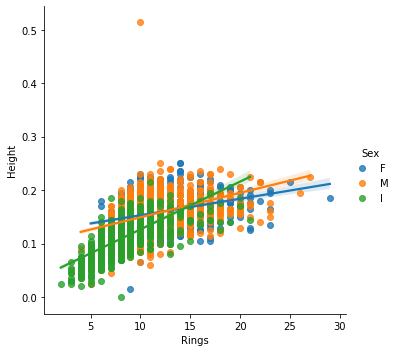

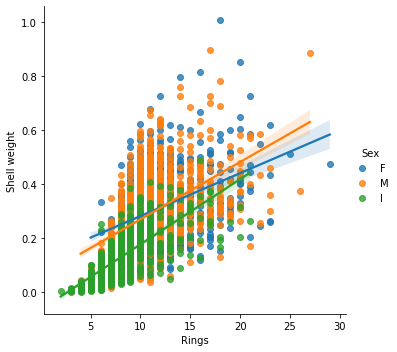

In [27]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=abalone_data, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=abalone_data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

# Conclusion

By observing the correlation between the target attribute Rings and the indepent variables, we conclude that it is possible to build a model to predict the target value in function of the independent attributes.
The weight of the Abalones varies proportional to their sizes
There's no significant differences in size, weight and numbers of rigns between male/female abalones
The Infant Abalones groups presents lower mean values of size, weight and number of rings
The weight and height of abalones varies accordingly to age until the adult age, after adult life size and weight stops varying, and after 16.5 years (15 rings) these measurements aren't correlated.